In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_netflix = pd.read_csv('./netflixdailytop10.csv')

## - Tipos de dados disponíveis

In [3]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


## - Período da análise feita

In [4]:
df_netflix.head(5)

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55


In [6]:
df_netflix.tail(5)

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
7095,2022-03-11,6,5,1,Worst Roommate Ever,TV Show,Yes,"Mar 1, 2022",10,81
7096,2022-03-11,7,7,2,Vikings: Valhalla,TV Show,Yes,"Feb 25, 2022",14,100
7097,2022-03-11,8,8,-,Shooter,Movie,NaN,"Aug 1, 2014",3,7
7098,2022-03-11,9,9,7,Shrek 2,Movie,NaN,"Mar 1, 2022",10,33
7099,2022-03-11,10,10,-,Shrek,Movie,NaN,"May 1, 2018",7,12


## - Tamanho da base de dados

In [7]:
len(df_netflix)

7100

## - Verificar dados nulos

In [14]:
df_netflix.isna().sum()

As of                   0
Rank                    0
Year to Date Rank       0
Last Week Rank          0
Title                   0
Type                    0
Netflix Exclusive       0
Netflix Release Date    0
Days In Top 10          0
Viewership Score        0
dtype: int64

In [11]:
df_netflix['Netflix Exclusive'].isna().sum()

np.int64(2501)

# - Outliers

In [12]:
# Remover linhas com valores nulos
df_netflix.dropna(axis=0, inplace=True)

In [13]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4599 entries, 0 to 7096
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 4599 non-null   object
 1   Rank                  4599 non-null   int64 
 2   Year to Date Rank     4599 non-null   object
 3   Last Week Rank        4599 non-null   object
 4   Title                 4599 non-null   object
 5   Type                  4599 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  4599 non-null   object
 8   Days In Top 10        4599 non-null   int64 
 9   Viewership Score      4599 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 395.2+ KB


<Axes: >

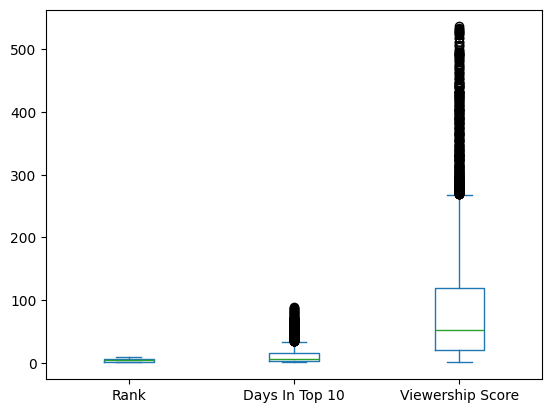

In [15]:
# Box Plot Geral
df_netflix.plot.box()

<Axes: ylabel='Frequency'>

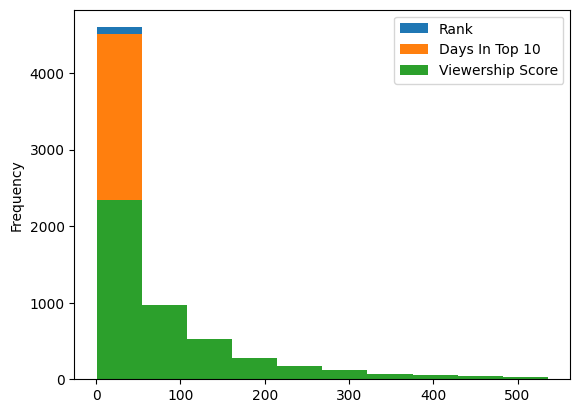

In [16]:
# Histograma - Checar visualmente se os dados seguem uma distribuição normal
df_netflix.plot.hist()

In [24]:
# ZScore (Usado para distribuição Normal)
#Indica quantos desvios padrões um pponto especifico de dados esta distante da média
# zscore = (x - media) / desvio padrao
from scipy.stats import zscore
import numpy as np

In [25]:
z= np.abs(zscore(df_netflix['Viewership Score']))

In [26]:
z

0       0.013668
1       0.446880
4       0.344536
5       0.764146
6       0.856256
          ...   
7091    0.211489
7093    1.651173
7094    2.285705
7095    0.078441
7096    0.116012
Name: Viewership Score, Length: 4599, dtype: float64

In [27]:
df_netflix[z > 3.0]

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
2536,2020-12-10,7,6,5,The Queenâs Gambit,TV Show,Yes,"Oct 23, 2020",48,385
2546,2020-12-11,7,7,5,The Queenâs Gambit,TV Show,Yes,"Oct 23, 2020",49,389
2558,2020-12-12,9,7,6,The Queenâs Gambit,TV Show,Yes,"Oct 23, 2020",50,391
2569,2020-12-13,10,9,8,The Queenâs Gambit,TV Show,Yes,"Oct 23, 2020",51,392
2577,2020-12-14,8,10,7,The Queenâs Gambit,TV Show,Yes,"Oct 23, 2020",52,395
...,...,...,...,...,...,...,...,...,...,...
6954,2022-02-25,5,5,5,Ozark,TV Show,Yes,"Jul 21, 2017",85,524
6967,2022-02-26,8,5,8,Ozark,TV Show,Yes,"Jul 21, 2017",86,527
6979,2022-02-27,10,8,7,Ozark,TV Show,Yes,"Jul 21, 2017",87,528
6986,2022-02-28,7,10,7,Ozark,TV Show,Yes,"Jul 21, 2017",88,532
